<a href="https://colab.research.google.com/github/VictorHugoMartins/israel_x_palestine_data_analysis/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 😠 Estudo sobre o Detoxify
## O que ele detecta?
- toxicity: Toxicidade geral
- severe_toxicity: Toxicidade muito agressiva
- obscene: Obscenidade / Palavrões
- threat: Ameaça
- insult: Insulto
- identity_attack: Ataque a identidades (baseado em raça, religião, orientação sexual, etc.)
- sexual_explicit: Conteúdo sexualmente explícito

## Quais modelos estão disponíveis?
- original: O modelo padrão, treinado nos dados da competição Jigsaw. É rápido e eficaz.
- unbiased: Uma versão do modelo treinada para reduzir o viés (bias). Modelos de toxicidade podem, por engano, associar palavras neutras de identidade (ex: "gay", "mulher", "negro") à toxicidade. Este modelo tenta mitigar esse problema.
multilingual: Um modelo treinado para suportar múltiplos idiomas, incluindo português, espanhol, francês, italiano, entre outros.

## Limitações:
- Viés (Bias): Mesmo o modelo unbiased não é perfeito e ainda pode apresentar vieses.
- Contexto: A ferramenta não entende o contexto completo de uma conversa e pode errar em casos de sarcasmo, ironia ou reapropriação de termos.
Novas Gírias e Emojis: Modelos podem demorar a se adaptar a novas formas de comunicação tóxica.


# 🈺 Instalações

In [ ]:
%pip install detoxify pandas torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli


# 💔 Detoxify

## 📸 Vídeos

# Gráficos após predição de toxicidade

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/red_pill_analises/data_base/resultados/'

Mounted at /content/drive


In [ ]:
import pandas as pd

df_videos = pd.read_csv(folder_path + 'videos_com_scores_de_toxicidade.csv')
print(len(df_videos))

18034


In [ ]:
import numpy as np

limite_toxicidade = 0.6

df_videos['is_misogino'] = np.where(df_videos['detoxify_toxicity'] > limite_toxicidade, 1, 0)

In [ ]:
# Dada as anotações manuais
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

def calculate_kappa(df):
    return cohen_kappa_score(df['label_annotator1'], df['label_annotator2'], df['label_annotator3'])

def calculate_kappas(df):
    kappa_12 = cohen_kappa_score(df['label_annotator1'], df['label_annotator2'])
    kappa_13 = cohen_kappa_score(df['label_annotator1'], df['label_annotator3'])
    kappa_23 = cohen_kappa_score(df['label_annotator2'], df['label_annotator3'])

    return {
        'kappa_1_2': kappa_12,
        'kappa_1_3': kappa_13,
        'kappa_2_3': kappa_23,
        'kappa_mean': (kappa_12 + kappa_13 + kappa_23) / 3
    }

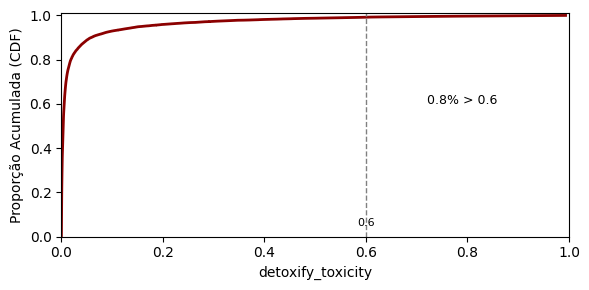

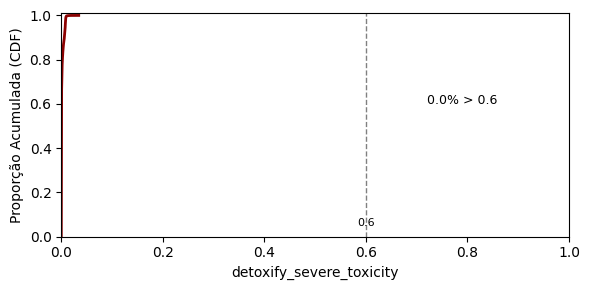

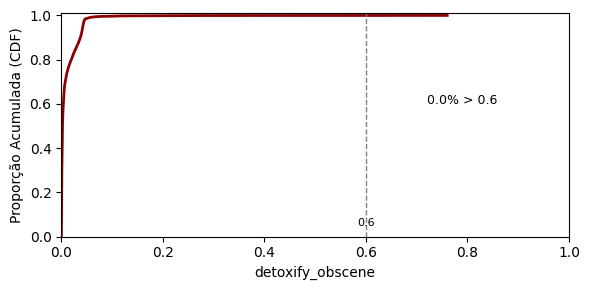

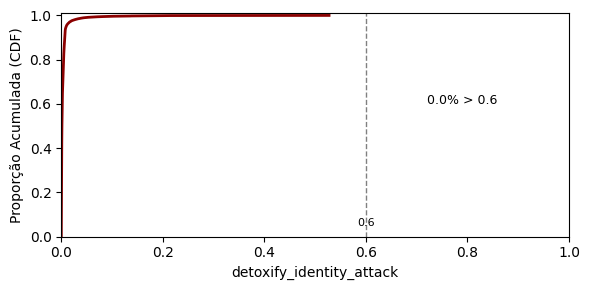

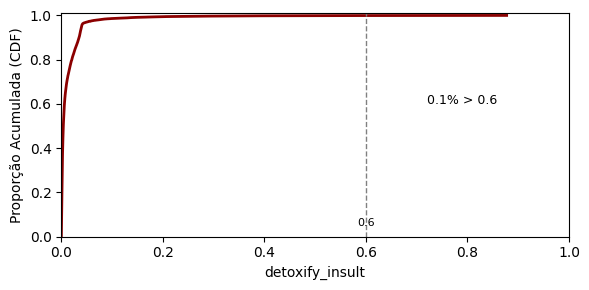

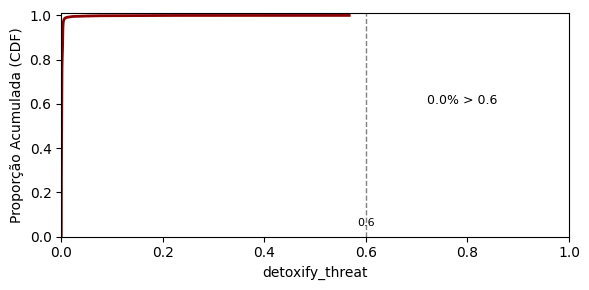

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_toxicity_cdf(df, column):
    # 1. Pega a coluna de toxicidade de todos os vídeos
    toxicity_scores = df[column].dropna().values

    # 2. Ordena os valores em ordem crescente (essencial para CDF)
    sorted_scores = np.sort(toxicity_scores)

    # 3. Cria os valores acumulados (proporção)
    cdf = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

    # 4. Cria o gráfico
    plt.figure(figsize=(6, 3))
    plt.plot(sorted_scores, cdf, color='darkred', lw=2, label='CDF')

    # 5. Adiciona linha vertical no ponto 0.6
    plt.axvline(x=0.6, color='gray', linestyle='--', lw=1)
    plt.text(0.6, 0.05, '0.6', ha='center', fontsize=8)

    # 6. Calcula e mostra % de vídeos com toxicidade > 0.6
    perc_above = np.sum(toxicity_scores > 0.6) / len(toxicity_scores) * 100
    plt.text(0.72, 0.6, f'{perc_above:.1f}% > 0.6', color='black', fontsize=9)

    # 7. Formatações finais
    plt.xlabel(column)
    plt.ylabel("Proporção Acumulada (CDF)")
    plt.grid(False)
    plt.ylim(0, 1.01)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

for column in ['detoxify_toxicity', 'detoxify_severe_toxicity', 'detoxify_obscene', 'detoxify_identity_attack', 'detoxify_insult', 'detoxify_threat']:
  plot_toxicity_cdf(df_videos, column)


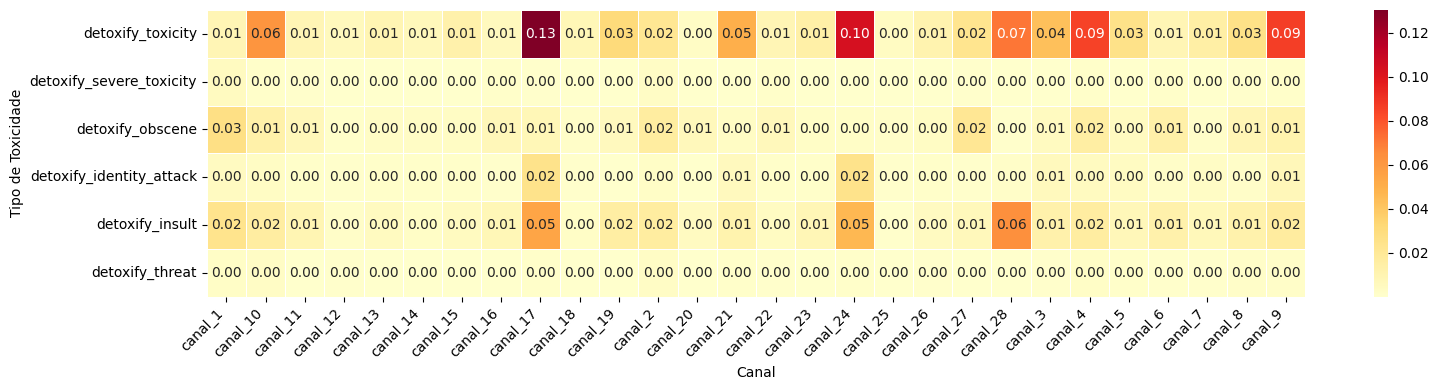

In [ ]:
import seaborn as sns

tox_cols = ['detoxify_toxicity', 'detoxify_severe_toxicity', 'detoxify_obscene', 'detoxify_identity_attack', 'detoxify_insult', 'detoxify_threat']

# Agrupamento: média por canal para cada tipo de toxicidade
channel_tox = df_videos.groupby('id_canal_anonimizado')[tox_cols].mean().T  # Transpõe para linhas = tipos, colunas = canais

# Heatmap
plt.figure(figsize=(16, 4))  # Ajusta o tamanho dinamicamente pelo nº de canais
sns.heatmap(channel_tox, annot=True, fmt=".2f", cmap='YlOrRd', linewidths=0.5)

plt.xlabel("Canal")
plt.ylabel("Tipo de Toxicidade")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


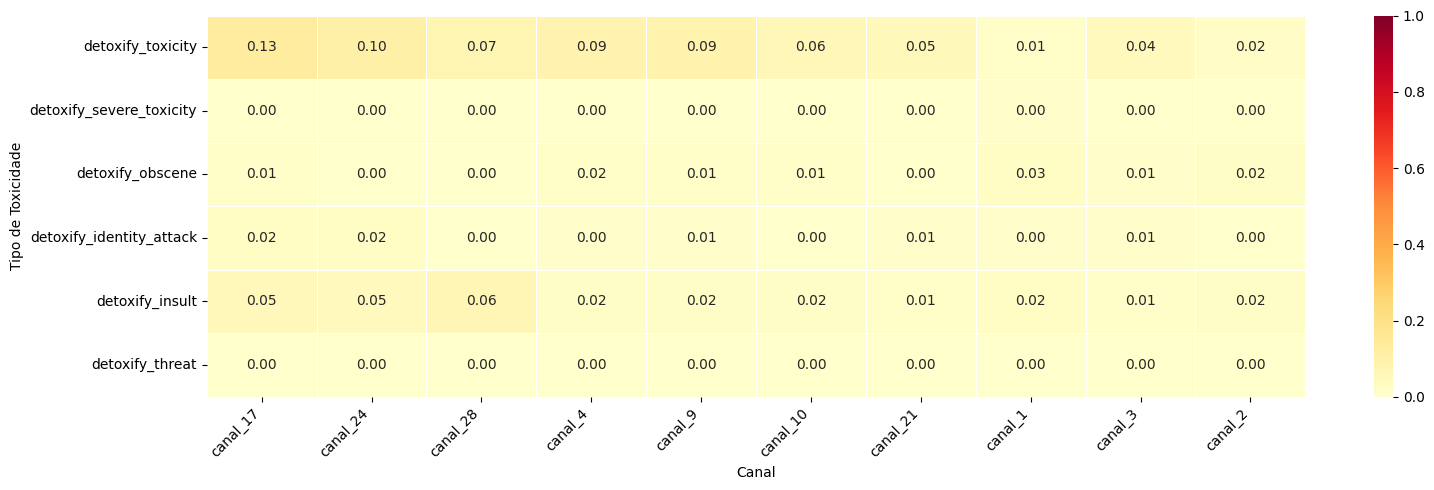

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_media_por_tipo(df):
  # Lista das colunas de toxicidade

  # Número de canais a exibir no heatmap (os mais tóxicos com base na média geral de toxicidade)
  TOP_N = 10

  # Calcula a média de toxicidade por canal para cada categoria
  channel_tox_avg = df.groupby('id_canal_anonimizado')[tox_cols].mean()

  # Ordena os canais pela média geral de toxicidade (ou use outra métrica se preferir)
  channel_tox_avg['media_geral'] = channel_tox_avg.mean(axis=1)
  top_canais = channel_tox_avg.sort_values(by='media_geral', ascending=False).head(TOP_N).drop(columns='media_geral')

  # Transpõe: linhas = tipos de toxicidade, colunas = canais
  channel_tox = top_canais.T

  # Heatmap
  plt.figure(figsize=(1.6 * TOP_N, 5))  # Largura proporcional ao número de canais
  sns.heatmap(channel_tox, annot=True, fmt=".2f", cmap='YlOrRd', linewidths=0.5, vmin=0, vmax=1)

  plt.xlabel("Canal")
  plt.ylabel("Tipo de Toxicidade")
  #plt.title("Média de toxicidade por tipo (Top canais)")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

plot_media_por_tipo(df_videos)

In [ ]:
tox_cols = ['detoxify_toxicity']

# Calcula média das colunas de toxicidade por canal
media_tox_por_canal = df_videos.groupby('id_canal_anonimizado')[tox_cols].mean().sort_values(by='detoxify_toxicity', ascending=False)

display(media_tox_por_canal.head(10))  # top 10 canais mais tóxicos (média)


,detoxify_toxicity
id_canal_anonimizado,
canal_17,0.130339
canal_24,0.103519
canal_9,0.086340
canal_4,0.085303
canal_28,0.070872
canal_10,0.061727
canal_21,0.050069
canal_3,0.043056
canal_19,0.030689


In [ ]:
def resumo_toxicidade(df):
    total_videos = len(df)

    # Garante que a coluna esteja limpa
    toxicity = df['detoxify_toxicity'].dropna()

    print("🎯 Total de vídeos analisados:", total_videos)
    print("")

    ### 📌 2. PROPORÇÕES POR FAIXAS DE TOXICIDADE ###
    def calc_percent(cond):
        return 100 * cond.sum() / total_videos

    print("📊 Proporções por faixas de toxicidade:")
    print(f"- [0.00]                     : {calc_percent(toxicity == 0):.2f}% (toxicity == 0)")
    print(f"- (0.00 – 0.05]              : {calc_percent((toxicity > 0) & (toxicity <= 0.05)):.2f}%")
    print(f"- (0.05 – 0.2]               : {calc_percent((toxicity > 0.05) & (toxicity <= 0.2)):.2f}%")
    print(f"- (0.2 – 0.5]                : {calc_percent((toxicity > 0.2) & (toxicity <= 0.5)):.2f}%")
    print(f"- (0.5 – 0.7]                : {calc_percent((toxicity > 0.5) & (toxicity <= 0.7)):.2f}%")
    print(f"- (0.7 – 0.9]                : {calc_percent((toxicity > 0.7) & (toxicity <= 0.9)):.2f}%")
    print(f"- (0.9 – 1.0]                : {calc_percent((toxicity > 0.9) & (toxicity <= 1.0)):.2f}%")

    print("")

    ### 📌 3. CONTAGENS ###
    print("🔢 Contagens:")
    print(f"- Total de vídeos           : {total_videos}")
    print(f"- Toxicidade > 0.7          : {(toxicity > 0.7).sum()} vídeos")
    print(f"- Toxicidade > 0.9          : {(toxicity > 0.9).sum()} vídeos")
    print(f"- Toxicidade muito baixa (≤ 0.05): {(toxicity <= 0.05).sum()} vídeos")

resumo_toxicidade(df_videos)

🎯 Total de vídeos analisados: 18034

📊 Proporções por faixas de toxicidade:
- [0.00]                     : 0.00% (toxicity == 0)
- (0.00 – 0.05]              : 88.82%
- (0.05 – 0.2]               : 7.09%
- (0.2 – 0.5]                : 2.82%
- (0.5 – 0.7]                : 0.74%
- (0.7 – 0.9]                : 0.42%
- (0.9 – 1.0]                : 0.11%

🔢 Contagens:
- Total de vídeos           : 18034
- Toxicidade > 0.7          : 94 vídeos
- Toxicidade > 0.9          : 19 vídeos
- Toxicidade muito baixa (≤ 0.05): 16018 vídeos


/tmp/ipython-input-3410990527.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='Reds_r')


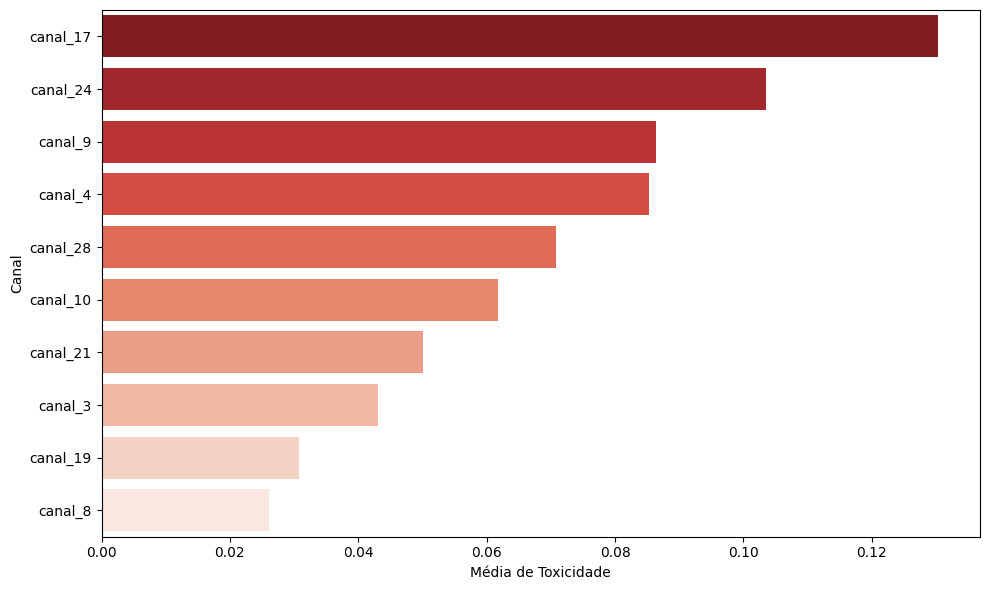

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_toxicity_por_canal(df):
    TOP_N = 10

    # Calcula a média de toxicity por canal
    channel_tox = df.groupby('id_canal_anonimizado')['detoxify_toxicity'].mean()

    # Seleciona os TOP_N canais mais tóxicos
    top_channels = channel_tox.sort_values(ascending=False).head(TOP_N)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_channels.values, y=top_channels.index, palette='Reds_r')
    plt.xlabel("Média de Toxicidade")
    plt.ylabel("Canal")
    #plt.title("Top 10 canais mais tóxicos (média de toxicity)")
    # plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

plot_toxicity_por_canal(df_videos)

## Finetunning do Threshold

### 🧑 Por Canal

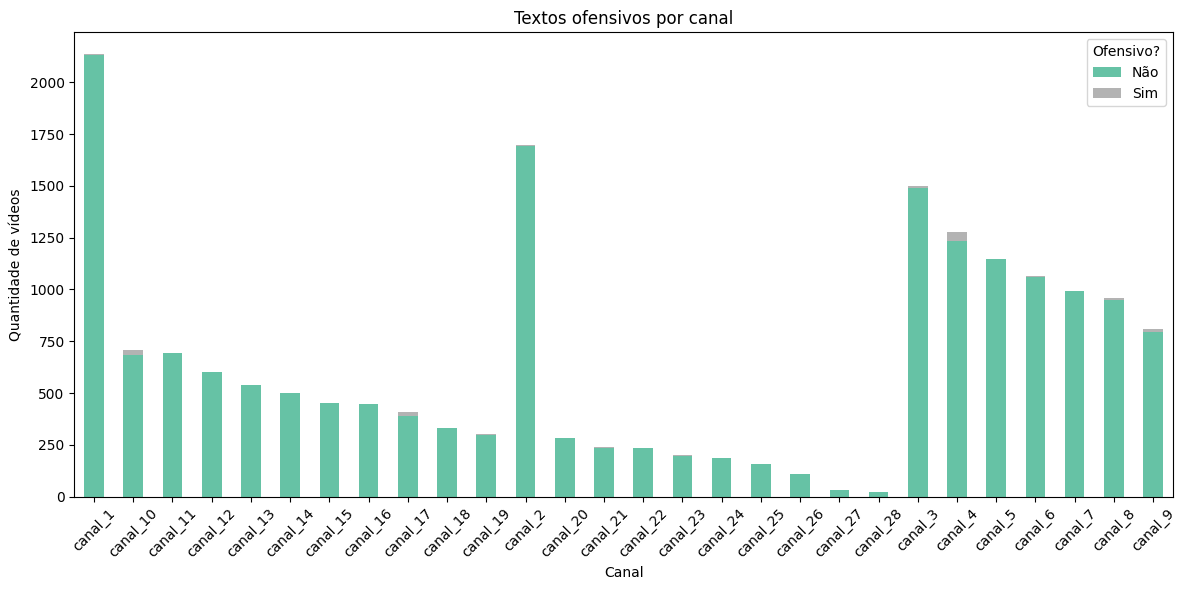

In [ ]:
# df_videos['is_offensive'] = df_videos['toxicity'] > 0.7

offensive_counts = df_videos.groupby('id_canal_anonimizado')['is_misogino'].value_counts().unstack(fill_value=0)

offensive_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Textos ofensivos por canal")
plt.xlabel("Canal")
plt.ylabel("Quantidade de vídeos")
plt.legend(title='Ofensivo?', labels=['Não', 'Sim'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = df_videos

In [ ]:
counts = df['is_misogino'].value_counts().rename(index={0: 'Não tóxicos', 1: 'Tóxicos'})

print("Contagem de vídeos:")
print(counts)

Contagem de vídeos:
is_misogino
Não tóxicos    17887
Tóxicos          147
Name: count, dtype: int64


,is_misogino
id_canal_anonimizado,
canal_4,42
canal_10,23
canal_17,21
canal_9,15
canal_8,9
canal_3,8
canal_2,7
canal_21,5
canal_6,4


,media_is_misogino,total_comentarios
id_canal_anonimizado,,
canal_4,42,1277
canal_10,23,709
canal_17,21,410
canal_9,15,808
canal_8,9,960
canal_3,8,1498
canal_2,7,1698
canal_21,5,241
canal_6,4,1065


/tmp/ipython-input-3524452540.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_canais, x=f'media_{col}', y='id_canal_anonimizado', palette='Reds_r')


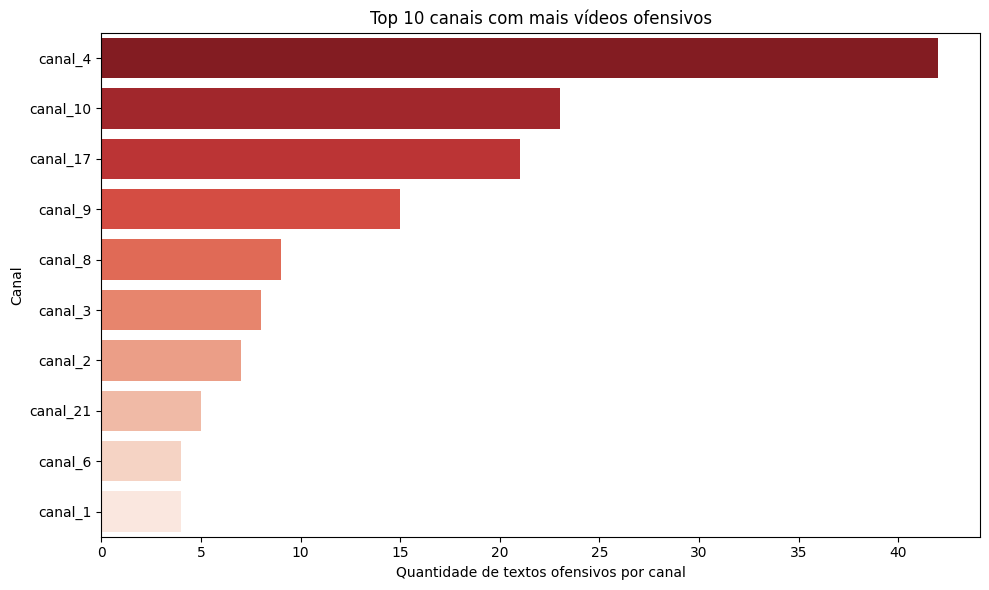

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pipe(df):
  tox_cols = ['is_misogino']

  # Calcula média das colunas de toxicidade por canal
  media_tox_por_canal = df.groupby('id_canal_anonimizado')[tox_cols].sum().sort_values(by='is_misogino', ascending=False)

  display(media_tox_por_canal.head(10))  # top 10 canais mais tóxicos (média)


  # Suponha que tox_cols já esteja definido, por exemplo:
  # tox_cols = ['toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']

  # Cria colunas booleanas indicando se o comentário é ofensivo (> 0.7) para cada tipo
  # for col in tox_cols:
  #     df[f'is_misogino_{col}'] = df[col] > 0.7

  # Calcula resumo por canal: média de toxicidade + % ofensivos + total de comentários
  resumo_canal = df.groupby('id_canal_anonimizado').agg(
      {col: 'sum' for col in tox_cols} |
      {f'is_misogino': 'sum' for col in tox_cols} |
      {'text': 'count'}
  ).rename(columns={col: f'media_{col}' for col in tox_cols} |
          {f'is_misogino_{col}': f'porcentagem_ofensivo_{col}' for col in tox_cols} |
          {'text': 'total_comentarios'})

  # Ordena por média de toxicidade (pode mudar para outra variável se quiser)
  resumo_ordenado = resumo_canal.sort_values(by=f'media_{tox_cols[0]}', ascending=False)

  # Mostra o resumo
  display(resumo_ordenado.head(10))


  top_canais = resumo_ordenado.reset_index().head(10)

  for col in tox_cols:
      plt.figure(figsize=(10, 6))
      sns.barplot(data=top_canais, x=f'media_{col}', y='id_canal_anonimizado', palette='Reds_r')
      plt.xlabel(f"Quantidade de textos ofensivos por canal")
      plt.ylabel("Canal")
      plt.title(f"Top 10 canais com mais vídeos ofensivos")
      plt.tight_layout()
      plt.show()

  return resumo_ordenado

resumo_ordenado = pipe(df)

/tmp/ipython-input-502485642.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-502485642.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


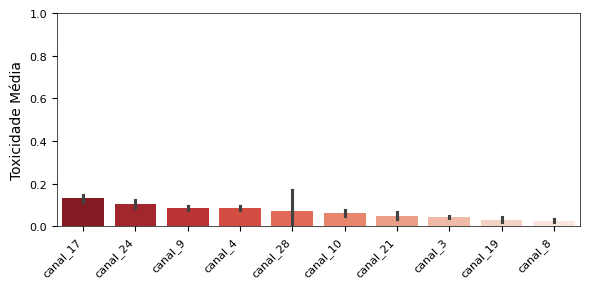

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_toxicity_compact(df):
    TOP_N = 10

    # Calcula a média de toxicidade (score contínuo) por canal
    channel_tox = df.groupby('id_canal_anonimizado')['detoxify_toxicity'].mean()

    # Seleciona os top N canais com maior média de toxicidade
    top_channels = channel_tox.sort_values(ascending=False).head(TOP_N).index

    # Filtra os dados originais para conter apenas os vídeos desses canais
    df_top = df[df['id_canal_anonimizado'].isin(top_channels)]

    # Define a ordem correta para o eixo X
    ordered_channels = channel_tox.loc[top_channels].sort_values(ascending=False).index

    plt.figure(figsize=(6, 3))  # compacto

    sns.barplot(
        data=df_top,
        x='id_canal_anonimizado',
        y='detoxify_toxicity',
        ci=95,  # intervalo de confiança para a média
        palette="Reds_r",
        order=ordered_channels
    )

    plt.ylabel("Toxicidade Média")
    plt.xlabel("")  # omite label para visual mais limpo
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim(0,1)
    plt.grid(False)

    # Personaliza as bordas do gráfico
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)

    plt.tight_layout()
    plt.show()

# Executa a função
plot_toxicity_compact(df_videos)


In [ ]:
df['is_toxico'] = np.where(df_videos['detoxify_toxicity'] > 0.3, 1, 0)

In [ ]:
df.to_csv(folder_path + 'videos_classificados_apos_experimento.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'published_at', 'category_id', 'tags', 'view_count',
       'like_count', 'comment_count', 'duration', 'definition', 'caption',
       'licensed_content', 'privacy_status', 'license', 'embeddable',
       'public_stats_viewable', 'is_made_for_kids', 'thumbnail_url',
       'default_audio_language', 'default_language', 'actual_start_time',
       'scheduled_start_time', 'actual_end_time', 'scheduled_end_time',
       'concurrent_viewers', 'active_live_chat_id', 'recording_date',
       'topicCategories', 'processing_status', 'parts_total',
       'parts_processed', 'time_left_ms', 'processing_failure_reason',
       'transcription', 'id_canal_anonimizado', 'id_video_anonimizado', 'text',
       'emojis', 'hashtags', 'detoxify_toxicity', 'detoxify_severe_toxicity',
       'detoxify_obscene', 'detoxify_identity_attack', 'detoxify_insult',
       'detoxify_threat', 'detoxify_sexual_explicit', 'guardrail_score',
       'doug_health_score', 'doug_ideology_score', 'doug_i

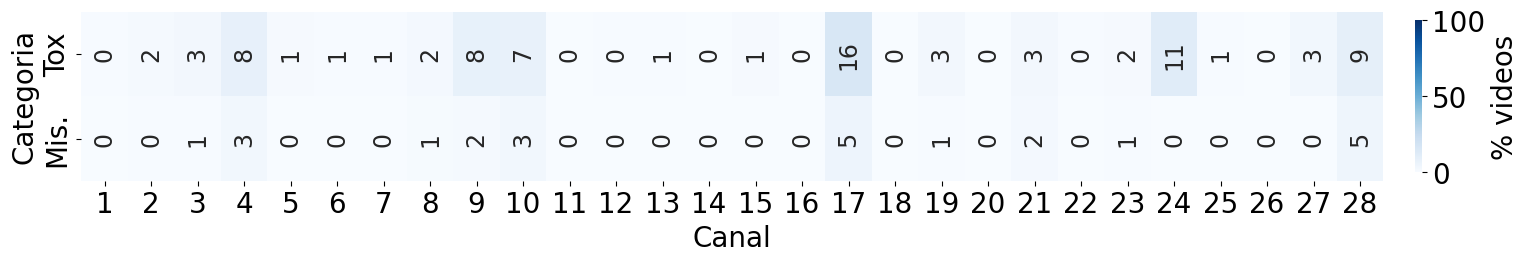

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Atualiza fonte
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
})

# Usa o DataFrame já carregado
df_roberta = df

# Conta o total de vídeos por canal
total_videos_por_canal = df_roberta.groupby('id_canal_anonimizado').size()

# Soma as flags de toxicidade e misoginia por canal
soma_flags = df_roberta.groupby('id_canal_anonimizado')[['is_toxico', 'is_misogino']].sum()

# Calcula a proporção: quantos são tóxicos/misóginos em relação ao total de vídeos do canal
proporcao_flags = soma_flags.div(total_videos_por_canal, axis=0).T

# Renomeia os índices
proporcao_flags.index = proporcao_flags.index.map({
    'is_toxico': 'Tox',
    'is_misogino': 'Mis.'
})

# Ordena os canais pelo número (assumindo o formato "canal_1", "canal_2", etc.)
ordem_canais = sorted(proporcao_flags.columns, key=lambda x: int(x.split('_')[1]))
proporcao_flags = proporcao_flags[ordem_canais]

proporcao_flags.columns = [x.split('_')[1] for x in proporcao_flags.columns]

# Cria o heatmap com proporções (valores entre 0 e 1)
fig, ax = plt.subplots(figsize=(17, 3))

heatmap = sns.heatmap(
    proporcao_flags * 100,  # converte para porcentagem
    annot=True,
    fmt=".0f",
    cmap="Blues",
    vmin=0, vmax=100,
    cbar_kws={'label': '% videos', 'shrink': 0.9, 'pad': 0.02},
    linewidths=0.0,
    linecolor='white',
    ax=ax,
    annot_kws={"size": 17, "rotation": 90}
)

#ax.tick_params(axis='y', rotation=0)

ax.set_xlabel('Canal')
ax.set_ylabel('Categoria')

colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 50, 100])  # define mais limiares

plt.subplots_adjust(left=0.05, right=0.92, bottom=0.2, top=0.95)
plt.tight_layout()
plt.show()


In [ ]:
# 17

In [ ]:
def exibir_exemplos(nome, df_exemplo):
    print(f"\n--- {nome} ---")
    for i, row in df_exemplo.iterrows():
        print(f"\nExemplo {i+1}:")
        print(f"Texto: {row['text']}")
        print(f"is_toxico: {row['is_toxico']}, is_misogino: {row['is_misogino']}, canal: {row['id_canal_anonimizado']}")

# Exemplo 1: 5 textos com is_toxico = 1
ex_toxico = df[df["is_toxico"] == 1].head(5)
exibir_exemplos("Textos Tóxicos", ex_toxico)

# Exemplo 2: 5 textos com is_misogino = 1
ex_misogino = df[df["is_misogino"] == 1]
exibir_exemplos("Textos Misóginos", ex_misogino)

# Exemplo 3: 5 textos com is_misogino = 1 e is_toxico = 0
ex_misogino_sem_toxico = df[(df["is_misogino"] == 1) & (df["is_toxico"] == 0)]
exibir_exemplos("Misóginos sem ser Tóxicos", ex_misogino_sem_toxico)

# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_toxico"] == 1) & (df["is_misogino"] == 0)]
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)



--- Textos Tóxicos ---

Exemplo 155:
Texto: “Mãe não dá mole para filhas preguiçosas e abusadas” #rafaelaires #antiotario #redpill 
is_toxico: 1, is_misogino: 0, canal: canal_2

Exemplo 191:
Texto: Ela traiu e foi traida #hackeandoamatrix No último domingo (09), Natinha, jogadora da Seleção Brasileira de vôlei, expôs nas redes sociais a traição de seu namorado, o massagista e fisioterapeuta João Pedro. Agora, um novo capítulo da história veio à tona: a atleta está sendo acusada por uma internauta de, supostamente, ter sido amante e ter traído o ex-marido no passado. Eita!O que aconteceu?Durante o fim de semana, Natinha apareceu visivelmente abalada em uma transmissão ao vivo no Instagram. No vídeo, a líbero relatava que descobriu a traição do namorado, enquanto realizava uma surpresa romântica para ele. "Ele tava aqui no Rio de Janeiro com essa vagab*nda me traindo", disse ela. "Ele é um lixo. Para que todos vocês saibam aqui, pra não ficar lá pagando para ele não. Não paguem pau pra 

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["detoxify_toxicity"] < 0.05) & (df["is_misogino"] == 0)]
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)



--- Tóxicos sem ser Misóginos ---

Exemplo 1:
Texto: Isto pode te salvar homem #homem #homens #homemdevalor #homemmoderno #motivação 
is_toxico: 0, is_misogino: 0, canal: canal_7

Exemplo 2:
Texto: Amor de vó 🫡 Clicando no link abaixo, você obtém:- Antiotário 📕- Atualizações 📃- Chave de acesso ao nosso grupo privado 🔐🔗| https://antiotariopro.com/mega-manual/
is_toxico: 0, is_misogino: 0, canal: canal_16

Exemplo 3:
Texto: Quem muito rejeita, uma hora perde. | Qual a sua opinião? #rafaelaires #antiotario #redpillbrasil🔥 Pare de ser feito de Otário! 🔥📕 Manual AntiOtário✅ Evitar manipulações e jogos emocionais✅ Se posicionar com inteligência nos relacionamentos✅ Torne-se a melhor versão de si mesmo📚 Adquira o seu agora! ⤵➡️| hotm.art/geracaoantiotario🚀 O livro que te ensina a se impor, evitar ciladas e nunca mais ser feito de trouxa.
is_toxico: 0, is_misogino: 0, canal: canal_11

Exemplo 4:
Texto: Criatividade é outro nível 👊🏽😃 
is_toxico: 0, is_misogino: 0, canal: canal_5

Exemplo 5:
Te

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_toxico"] == 1) & (df["id_canal_anonimizado"] == 'canal_24')]
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)


In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_misogino"] == 1) & (df["id_canal_anonimizado"] == 'canal_17')].sample(15)
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["id_canal_anonimizado"] == 'canal_24')].sample()
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_misogino"] == 1) & (df["id_canal_anonimizado"] == 'canal_10')].sample(5)
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_misogino"] == 1) & (df["id_canal_anonimizado"] == 'canal_9')].sample(5)
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)

In [ ]:
# Exemplo 4: 5 textos com is_toxico = 1 e is_misogino = 0
ex_toxico_sem_misogino = df[(df["is_toxico"] == 1) & (df["is_misogino"] == 0)]
exibir_exemplos("Tóxicos sem ser Misóginos", ex_toxico_sem_misogino)

In [ ]:
# Exemplo 3: 5 textos com is_misogino = 1 e is_toxico = 0
ex_misogino_sem_toxico = df[(df["is_misogino"] == 0) & (df["is_toxico"] == 0)]
exibir_exemplos("Não Misóginos nem Tóxicos", ex_misogino_sem_toxico)

Streaming output truncated to the last 5000 lines.

Exemplo 16739:
Texto: ELA QUER FALAR QUE TODO HOMEM É QUEBRADO MAS NÃO QUER TRABALHAR E CONQUISTAR SUA FORTUNA! Olá! seja bem vindo a mais um vídeo do canal. não se esqueça de se inscrever no canal e deixar o like  além disso ative o sininho de notificações para não perder nenhum vídeo. vamos começar;
is_toxico: 0, is_misogino: 0, canal: canal_4

Exemplo 16740:
Texto: Curso Gratuito de Bitcoin entenda de uma vez por Todas. 💰 **Curso Gratuito de Bitcoin: Entenda de Uma Vez por Todas!** 💰Neste vídeo, apresentamos um curso gratuito completo sobre Bitcoin, projetado para desmistificar essa criptomoeda revolucionária. Vamos abordar desde os conceitos básicos, como o que é Bitcoin e como funciona, até tópicos mais avançados, como segurança, armazenamento e estratégias de investimento.Aprenda sobre a tecnologia blockchain, as vantagens e desvantagens do Bitcoin, e como ele pode impactar o futuro financeiro. Este curso é ideal para iniciantes

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Exemplo: carregando DataFrame
# df = pd.read_csv("seus_dados.csv")

# Calcula correlação
corr, p_value = spearmanr(df['is_toxico'], df['is_misogino'])

print(f"Correlação de Spearman: {corr:.4f}")
print(f"p-valor: {p_value:.4f}")

Correlação de Spearman: 0.5476
p-valor: 0.0000
